## Finally result written by me
2021.1.9

## import file

In [12]:
import librosa
AUDIO_FILE = 'assets/noise2.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

from IPython.display import Audio
Audio(samples, rate=sample_rate)

## audio plot

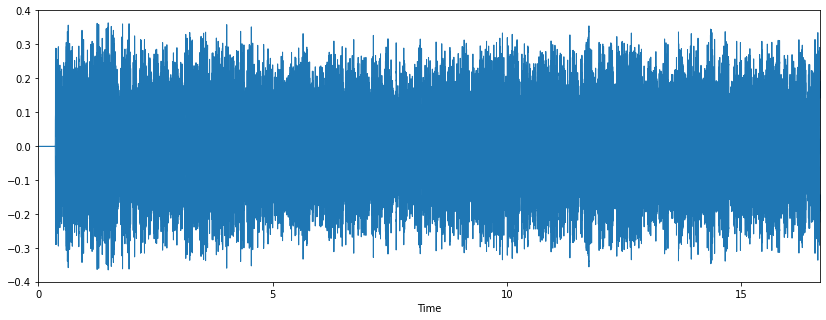

In [13]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

## Spectrum fft

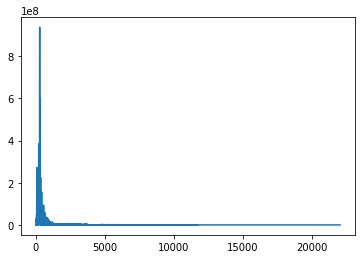

In [14]:
from scipy.fft import rfft, rfftfreq

N = len(samples)
normalized_tone = np.int16((samples / samples.max()) * 32767)
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.show()

## MEL_Scale plot

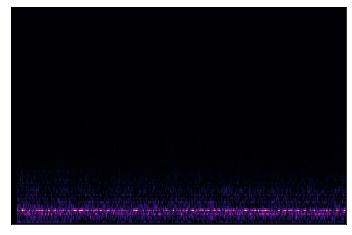

In [15]:
# use the mel-scale instead of raw frequency
import numpy as np
sgram = librosa.stft(samples)
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

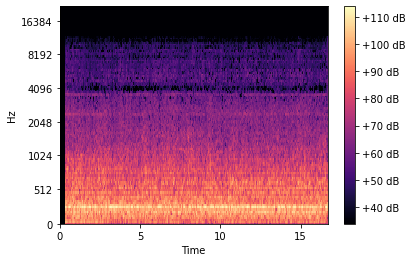

In [16]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')